In [1]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

%matplotlib inline

dir_data = '../data/'

In [2]:
f_app = os.path.join(dir_data, 'application_train.csv')
print('path of read in data: %s' % (f_app))

app_train = pd.read_csv(f_app)
app_train.head()

path of read in data: ../data/application_train.csv


,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0


In [3]:
# 1: 計算 AMT_ANNUITY 的 q0 - q100

q_all = app_train['AMT_ANNUITY'][0:101]
a = pd.DataFrame({'q': list(range(101)),'value':q_all})

print(a)

       q    value
0      0  24700.5
1      1  35698.5
2      2   6750.0
3      3  29686.5
4      4  21865.5
5      5  27517.5
6      6  41301.0
7      7  42075.0
8      8  33826.5
9      9  20250.0
10    10  21177.0
11    11  10678.5
12    12   5881.5
13    13  28966.5
14    14  32778.0
15    15  20160.0
16    16  26149.5
17    17  13500.0
18    18   7875.0
19    19  17563.5
20    20  21375.0
21    21  37561.5
22    22  32521.5
23    23  23850.0
24    24  12703.5
25    25  11074.5
26    26  27076.5
27    27  23827.5
28    28  57676.5
29    29   9000.0
..   ...      ...
71    71  24435.0
72    72  26140.5
73    73  28894.5
74    74  21775.5
75    75  37800.0
76    76   6750.0
77    77  15781.5
78    78  28273.5
79    79   5301.0
80    80   6750.0
81    81  14593.5
82    82  30280.5
83    83  13500.0
84    84  41076.0
85    85  38443.5
86    86  22072.5
87    87  10264.5
88    88  16965.0
89    89  30690.0
90    90  23755.5
91    91  31288.5
92    92  25065.0
93    93  27954.0
94    94  

In [4]:
#2.1 將Nas 以q50 填補
print('Before replace NAs, numbers of row that AMT_ANNUITY is NAs: %i' % sum(app_train['AMT_ANNUITY'].isnull()))


Before replace NAs, numbers of row that AMT_ANNUITY is NAs: 12


In [5]:
q_50 = list(app_train['AMT_ANNUITY'][0:101])
q_50 = np.median(q_50)
print(q_50)

app_train.loc[app_train["AMT_ANNUITY"].isnull(), "AMT_ANNUITY"] = q_50
print('Before replace NAs, numbers of row that AMT_ANNUITY is NAs: %i' % sum(app_train['AMT_ANNUITY'].isnull()))

24592.5
Before replace NAs, numbers of row that AMT_ANNUITY is NAs: 0


In [6]:
#2.2 Normalize values to -1 to 1
print("== Original data range ==")
print(app_train['AMT_ANNUITY'].describe())

== Original data range ==
count    307511.000000
mean      27108.475724
std       14493.463039
min        1615.500000
25%       16524.000000
50%       24903.000000
75%       34596.000000
max      258025.500000
Name: AMT_ANNUITY, dtype: float64


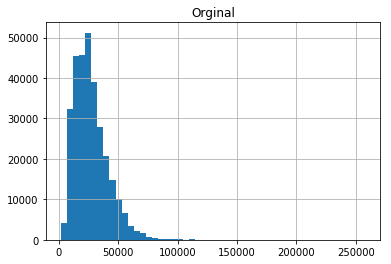

[24700.5 35698.5  6750.  ... 29979.  20205.  49117.5]


In [7]:
app_train['AMT_ANNUITY'].hist(bins = 50)
plt.title("Orginal")
plt.show()

value = app_train['AMT_ANNUITY'].values
print(value)


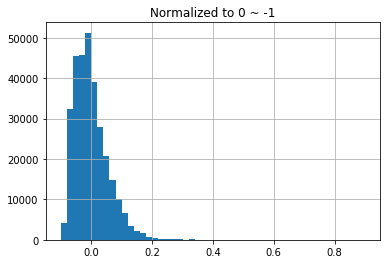

In [8]:
app_train['AMT_ANNUITY'] = ( value - np.mean(value)) / ( max(value) - min(value) )
app_train['AMT_ANNUITY'].hist(bins = 50)
plt.title("Normalized to 0 ~ -1")
plt.show()

In [9]:
#3 將 AMT_GOOD_PRICE 的 NAs 以眾數填補

In [10]:
print('Before replace Nas, numbers of row that AMT_GOODS_PRICE is NAs: %i' % sum(app_train['AMT_GOODS_PRICE'].isnull()))

Before replace Nas, numbers of row that AMT_GOODS_PRICE is NAs: 278


In [39]:

from scipy import stats
valuse_most = list(app_train['AMT_GOODS_PRICE'])
valuse_most = stats.mode(valuse_most)[0]
print(valuse_most)

app_train.loc[app_train['AMT_GOODS_PRICE'].isnull(),"AMT_GOODS_PRICE"] = valuse_most
NAs = valuse_most
    
print('Before replace Nas, numbers of row that AMT_GOODS_PRICE is NAs: %i' % sum(app_train['AMT_GOODS_PRICE'].isnull()))

[450000.]
Before replace Nas, numbers of row that AMT_GOODS_PRICE is NAs: 0
